In [1]:
import numpy as np
np.random.seed(20221110)
import matplotlib.pyplot as plt

In [2]:
#function that simulate the outcomes in control and treatment arms
def generate_outcome(probability, N): 
    #output a list of outcomes 0=not infected, 1=infected
    return np.random.choice([0, 1], size=N, p=[1-probability, probability])

In [3]:
#Testing generate_outcome
prob_control = 0.5 #probability of becoming infected in untreated pigs
prob_treated = 0.1 #probability of becoming infected after vaccine (theoretical)

N = 100  #sample size

#generate the control
control_outcome = generate_outcome(prob_control, N)
#generate the testing
treated_outcome = generate_outcome(prob_treated, N)

# Print the result
print(control_outcome, treated_outcome)

[1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1
 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0
 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1] [0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


In [5]:
#Function that performs permutation test
def permutation_test(treated_outcome, control_outcome):
    #calculate the observed difference between the two outcomes
    observed_difference = control_outcome.mean() - treated_outcome.mean()

    #put Treated and Control together
    all_outcome = np.concatenate((treated_outcome, control_outcome))

    #Split the group randomly 10000 times
    number_of_splits = 10000
    #create empty differences array
    differences = np.zeros(number_of_splits)
    #copy all_outcome array
    all_copy = all_outcome

    for i in range(number_of_splits):
        #shuffle outcomes
        np.random.shuffle(all_copy)
        #split shuffled outcomes
        fake_treated=all_copy[:len(treated_outcome)]
        fake_control=all_copy[len(treated_outcome):]

        #save differences
        differences[i]=fake_treated.mean()-fake_control.mean()

    #calculate the p-value
    p_value = np.sum(differences >= observed_difference)/differences.size
    
    return(p_value)

In [6]:
#Testing permutation_test
#probabilities have already been defined
#sample size, generate control, generate testing
N = 1 
control_outcome = generate_outcome(prob_control, N)
treated_outcome = generate_outcome(prob_testing, N)

#perform permutation test and print out p-value
print("Sample size:", N, "p-value: ", permutation_test(treated_outcome, control_outcome))

#sample size, generate control, generate testing
N = 5
control_outcome = generate_outcome(prob_control, N)
treated_outcome = generate_outcome(prob_testing, N)

#perform permutation test and print out p-value
print("Sample size:", N, "p-value: ", permutation_test(treated_outcome, control_outcome))

Sample size: 1 p-value:  1.0
Sample size: 5 p-value:  0.261726


C:\Users\mchan\AppData\Local\Temp\ipykernel_30368\1424031988.py:4: RuntimeWarning: Mean of empty slice.
  observed_difference = control_outcome.mean() - treated_outcome.mean()
C:\Users\mchan\AppData\Local\Temp\ipykernel_30368\1424031988.py:24: RuntimeWarning: Mean of empty slice.
  differences[i]=fake_treated.mean()-fake_control.mean()


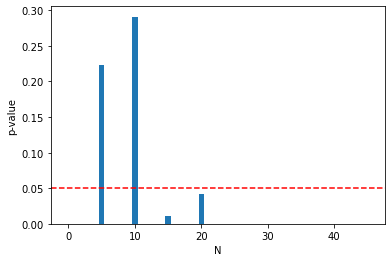

In [8]:
#Plot probability of a stat significant diff at a = 0.05 for values of N
p_values = []

for i in range(0, 50, 5):
    #probabilities have already been defined
    #sample size, generate control, generate testing
    N = i
    control_outcome = generate_outcome(prob_control, N)
    treated_outcome = generate_outcome(prob_treated, N)
    
    #perform permutation test and add p_value to the list
    p_values.append(permutation_test(treated_outcome, control_outcome))

plt.bar(range(0, 50, 5), p_values)

#add labels and sig line
plt.xlabel('N')
plt.ylabel('p-value')
plt.axhline(y=0.05, color='red', linestyle='--', label='a = 0.05')

This plot indicates that the sample size should be at least above 10 as all p-values after N = 10 is less than the significance level of 0.05.

In [20]:
#Putting everything together
def find_N(prob_control, prob_treated):
    #starting N count
    N = 1
    
    #create number of repeats
    #originally 100000 but significanty reduced as the runtime was too long (1hr got through a sample size of N = 1)
    repeats = 100
    
    #initialize counts for percentage
    significant = 0
    #not_significant = 0
    #empty percentage
    percent = 0
    
    #while percentage is less than 90
    while(percent < 90):
        #iterate through number of repeats
        for i in range(repeats):
            #generate new outcome
            control_output = np.random.choice([0, 1], size=N, p=[1-prob_control, prob_control])
            treated_outcome = np.random.choice([0, 1], size=N, p=[1-prob_treated, prob_treated])
            
            #get the p-value of these outcome
            #calculate the observed difference between the two outcomes
            observed_difference = control_outcome.mean() - treated_outcome.mean()

            #put Treated and Control together
            all_outcome = np.concatenate((treated_outcome, control_outcome))

            #Split the group randomly 10000 times
            number_of_splits = 10000
            #create empty differences array
            differences = np.zeros(number_of_splits)
            #copy all_outcome array
            all_copy = all_outcome

            for i in range(number_of_splits):
                #shuffle outcomes
                np.random.shuffle(all_copy)
                #split shuffled outcomes
                fake_treated=all_copy[:len(treated_outcome)]
                fake_control=all_copy[len(treated_outcome):]

                #save differences
                differences[i]=fake_treated.mean()-fake_control.mean()

            #calculate the p-value
            p_value = np.sum(differences >= observed_difference)/differences.size
            
            #check if the result is significant
            if (p_value < 0.05):
                #add to count
                significant = significant+1
            elif (p_value >= 0.05):
                #add to count
                not_significant += 1
        
        #update the percentage using significance counts
        percent = (significant/repeats) *100
        #print out line with N and percentage
        print("Sample size:", N, "Percent below 0.05 p-value:", percent, "%")
        
        #update sample size and significance counts for the next sample size
        N = N+1
        significant = 0
        #not_significant = 0

In [21]:
prob_control = 0.5 #probability of becoming infected in untreated pigs
prob_treated = 0.1 #probability of becoming infected after vaccine (theoretical)

#perform find N
find_N(prob_control, prob_treated)

Sample size: 1 Percent below 0.05 p-value: 92.0 %


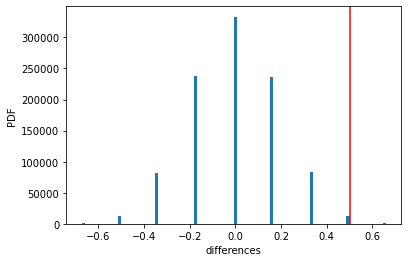

In [23]:
#Plot to confirm with N = 12
#sample size, generate control, generate testing
N = 12
control_outcome = generate_outcome(prob_control, N)
treated_outcome = generate_outcome(prob_testing, N)

#calculate the observed difference between the two outcomes
observed_difference = control_outcome.mean() - treated_outcome.mean()

#put Treated and Control together
all_outcome = np.concatenate((treated_outcome, control_outcome))

#Split the group randomly 100000 times
number_of_splits = 1000000
#create empty differences array
differences = np.zeros(number_of_splits)
#copy all_outcome array
all_copy = all_outcome

for i in range(number_of_splits):
    #shuffle outcomes
    np.random.shuffle(all_copy)
    #split shuffled outcomes
    fake_treated=all_copy[:len(treated_outcome)]
    fake_control=all_copy[len(treated_outcome):]

    #save differences
    differences[i]=fake_treated.mean()-fake_control.mean()
    
#create plot for N=12
fig=plt.hist(differences,bins=100,align='left')
plt.xlabel('differences')
plt.ylabel('PDF')
#compared to observed differences
plt.axvline(x=observed_difference, color='red');